##### Import necessary libraries

In [49]:
import tensorflow as tf
from tensorflow import keras
import numpy as  np
import matplotlib.pyplot as plt
fashion = keras.datasets.fashion_mnist
(xtrain, ytrain), (xtest, ytest) = fashion.load_data()

imgae label:  5


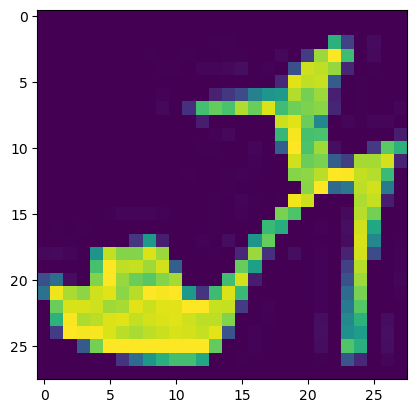

In [50]:
# Let's have a quick look at one of the samples of the images from the dataset
imageindex = 9
image = xtrain[imageindex]
print("imgae label: ", ytrain[imageindex])
plt.imshow(image)


In [51]:
# Now let's have a look at both of the training and test set
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)


In [52]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
print(model.summary())

c:\Users\thars\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

None


In [53]:
# Before training our model, I will split the training data into training and validation sets:

xvalid, xtrain = xtrain[:5000]/255.0, xtrain[5000:]/255.0
yvalid, ytrain = ytrain[:5000], ytrain[5000:]

In [54]:
print(f"xtrain shape: {xtrain.shape}, ytrain shape: {ytrain.shape}")
print(f"xvalid shape: {xvalid.shape}, yvalid shape: {yvalid.shape}")


xtrain shape: (55000, 28, 28), ytrain shape: (55000,)
xvalid shape: (5000, 28, 28), yvalid shape: (5000,)


##### Training a neural Classification model with Neural Networks

In [55]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(xtrain, ytrain, epochs=30, 
                    validation_data=(xvalid, yvalid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6931 - loss: 0.9961 - val_accuracy: 0.8264 - val_loss: 0.5120
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8312 - loss: 0.4969 - val_accuracy: 0.8556 - val_loss: 0.4370
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8428 - loss: 0.4510 - val_accuracy: 0.8606 - val_loss: 0.4115
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8520 - loss: 0.4234 - val_accuracy: 0.8612 - val_loss: 0.4098
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8615 - loss: 0.3970 - val_accuracy: 0.8610 - val_loss: 0.4001
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8658 - loss: 0.3796 - val_accuracy: 0.8672 - val_loss: 0.3840
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8708 - loss: 0.3656 - val_accuracy: 0.8698 - val_loss: 0.3696
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8759 - loss: 0.3514 - 

In [58]:
new = xtest[:5]
predictions = model.predict(new)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


In [59]:
# here's we can look at the predicted classes
classes = np.argmax(predictions, axis=1)
print(classes)

[9 2 1 1 6]


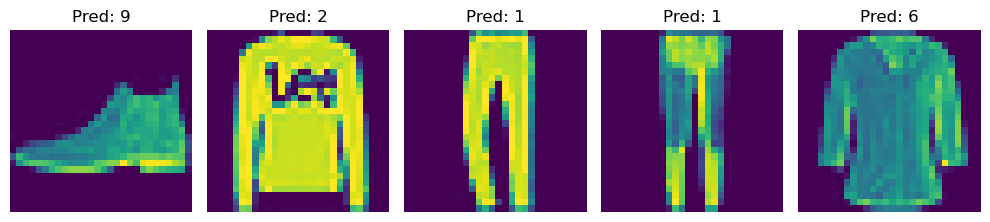

In [62]:
# Assuming 'new' contains the 5 images and 'classes' contains the predicted labels
plt.figure(figsize=(10, 5))  # Set the figure size

for i in range(5):  # Loop through the 5 images
    plt.subplot(1, 5, i + 1)  # Create a subplot for each image
    plt.imshow(new[i])  # Display the image in grayscale
    plt.title(f'Pred: {classes[i]}')  # Set the title with the predicted class
    plt.axis('off')  # Hide the axes

plt.tight_layout()  # Adjust layout for better spacing
plt.show()  # Display the images
